In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv(r'Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Check Null Values
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Inspect the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

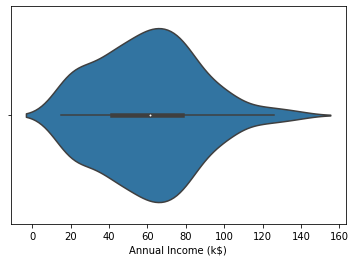

In [6]:
sns.violinplot(df['Annual Income (k$)'])


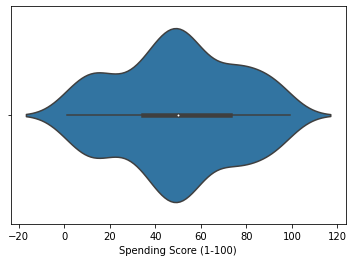

In [7]:
sns.violinplot(df['Spending Score (1-100)'])


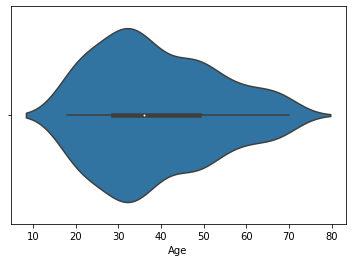

In [8]:
sns.violinplot(df['Age'])


In [9]:
# ax = sns.heatmap(df)

corr = df.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


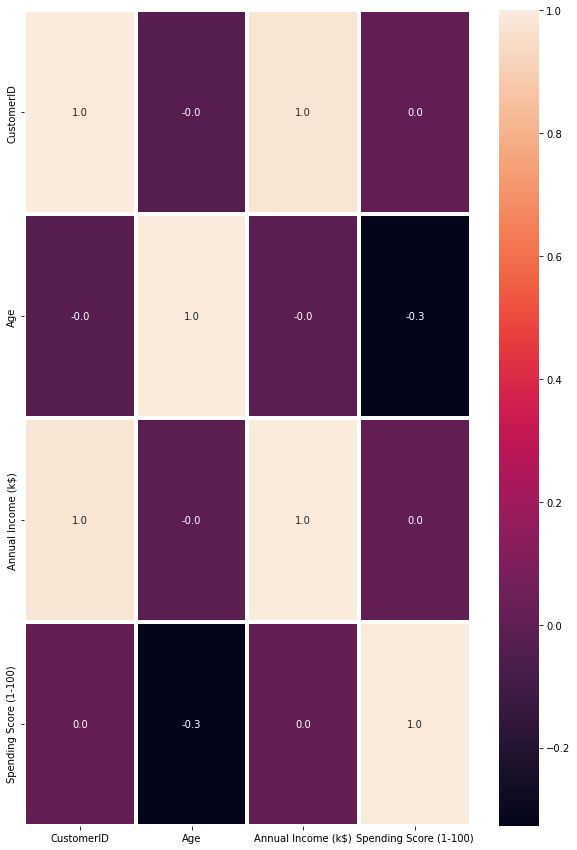

In [10]:
  fig = plt.subplots(figsize=(10, 15))
  sns.heatmap(df.corr(), annot=True, linewidths=3, fmt = '.1f')


In [11]:
# numworked = df.groupby(['Age', 'Annual Income (k$)']).apply(lambda x:x['Spending Score (1-100)'].count()).reset_index(name='Age')])
# px.area(numworked, x='Age', y='Annual Income (k$)', color = 'blue', title='Age & Annual Income')


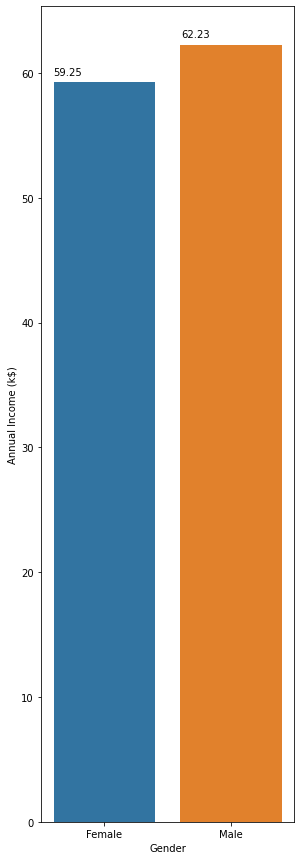

In [12]:
# BIVariate Analysis
plt.figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
cluster_type = df.groupby(['Gender'])['Annual Income (k$)'].mean().reset_index()
ax = sns.barplot(x='Gender', y = 'Annual Income (k$)', data=cluster_type)
for p in ax.patches:
  ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
  

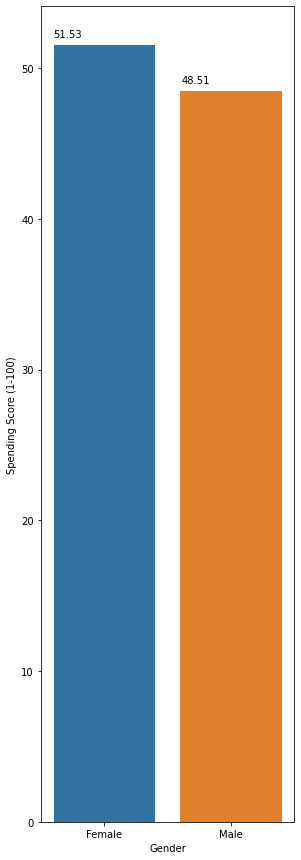

In [13]:
plt.figure(figsize=(10, 15))
plt.subplot(1, 2, 2)
cluster_type = df.groupby(['Gender'])['Spending Score (1-100)'].mean().reset_index()
ax = sns.barplot(x = 'Gender', y='Spending Score (1-100)', data=cluster_type)
for p in ax.patches:
  ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.show()

In [14]:
# Bining the Age of the Customers
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
slot = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75', '80+']

df['Age_Range'] = pd.cut(df['Age'], bins, labels = slot)


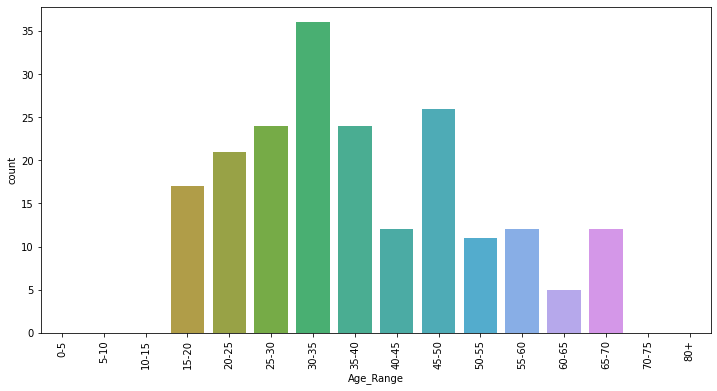

In [15]:
plt.figure(figsize=(12, 6))
edu = sns.countplot(x='Age_Range', data = df)
edu.set_xticklabels(edu.get_xticklabels(), rotation=90)
plt.show()


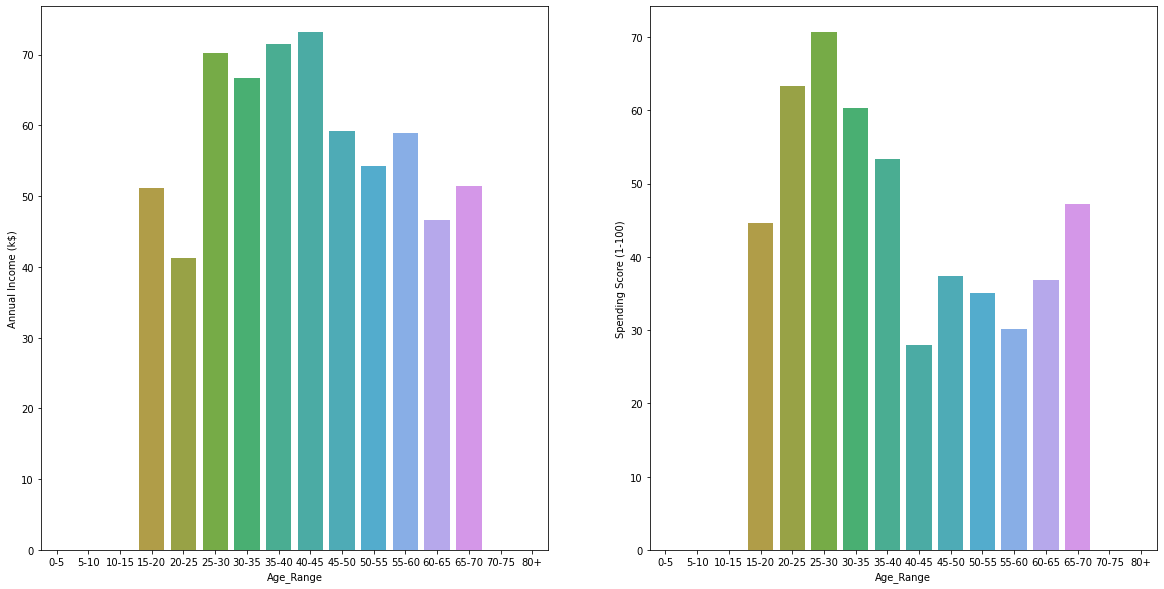

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
cluster_type = df.groupby(['Age_Range'])['Annual Income (k$)'].mean().reset_index()
sns.barplot(x='Age_Range', y = 'Annual Income (k$)', data=cluster_type)
plt.subplot(1, 2, 2)
cluster_type = df.groupby(['Age_Range'])['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x='Age_Range', y = 'Spending Score (1-100)', data=cluster_type)
plt.show()


In [17]:
df.drop('Age_Range', axis=1, inplace=True)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Hopkin Score

In [23]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(x):
  d = x.shape[1]
  n = len(x)
  m = int(0.1 * n)
  nbrs = NearestNeighbors(n_neighbors=1).fit(x.values)

  rand_x = sample(range(0, n, 1), m)

  ujd = []
  wjd = []
  for j in range(0, m):
    u_dist, _ = nbrs.kneighbors(uniform(np.amin(x, axis=0), np.amax(x, axis=0), d).reshape(1, -1), 2, return_distance=True)
    ujd.append(u_dist[0] [1])
    w_dist, _ = nbrs.kneighbors(x.iloc[rand_x[j]].values.reshape(1, -1), 2, return_distance = True)
    wjd.append(w_dist[0] [1])

  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H):
      print(ujd, wjd)
      H = 0

  return H 


In [24]:
hopkins(df.drop(['CustomerID', 'Gender'], axis=1))


0.748990477421846

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Scaling the Data

In [26]:
df_data = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_data)
df_scaled.shape

(200, 2)

In [27]:
# Converting the scaled data to dataframe
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_data.columns
df_scaled.head()


,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Hierarchial Clustering 

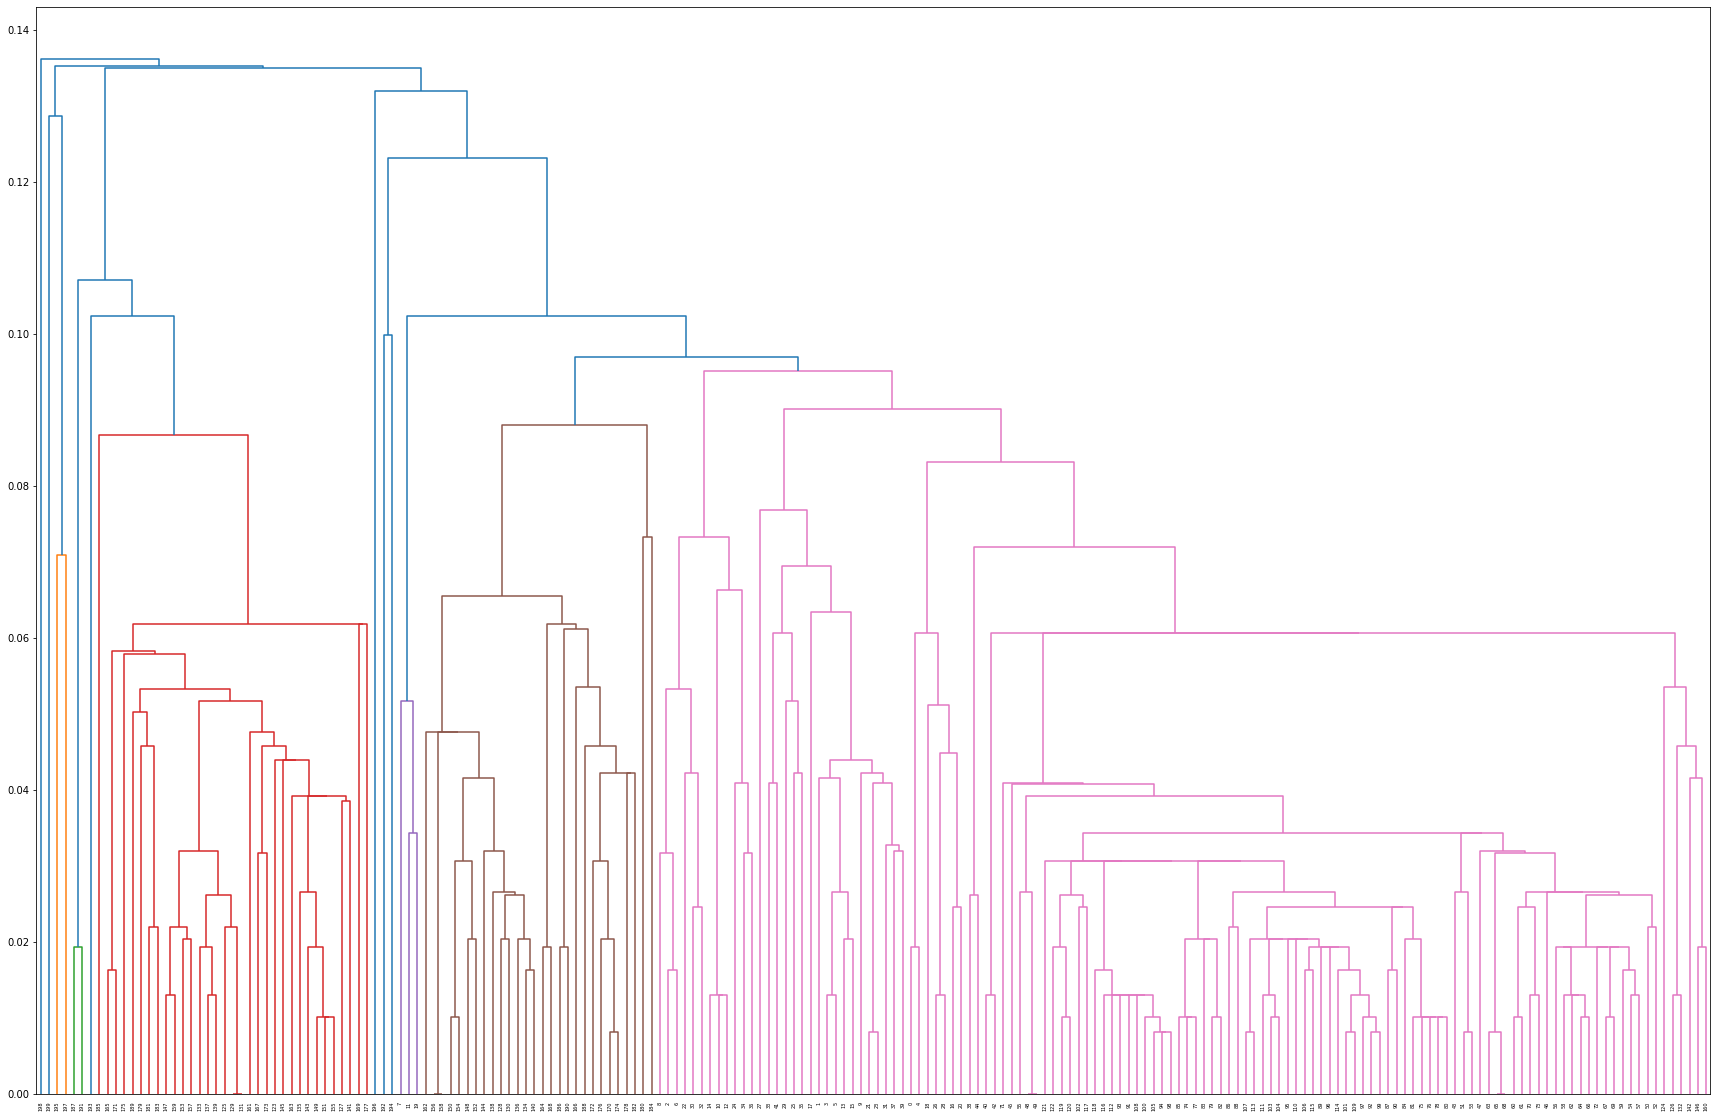

In [30]:
# single linkage
plt.figure(figsize=(30, 20))
mergings = linkage(df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()


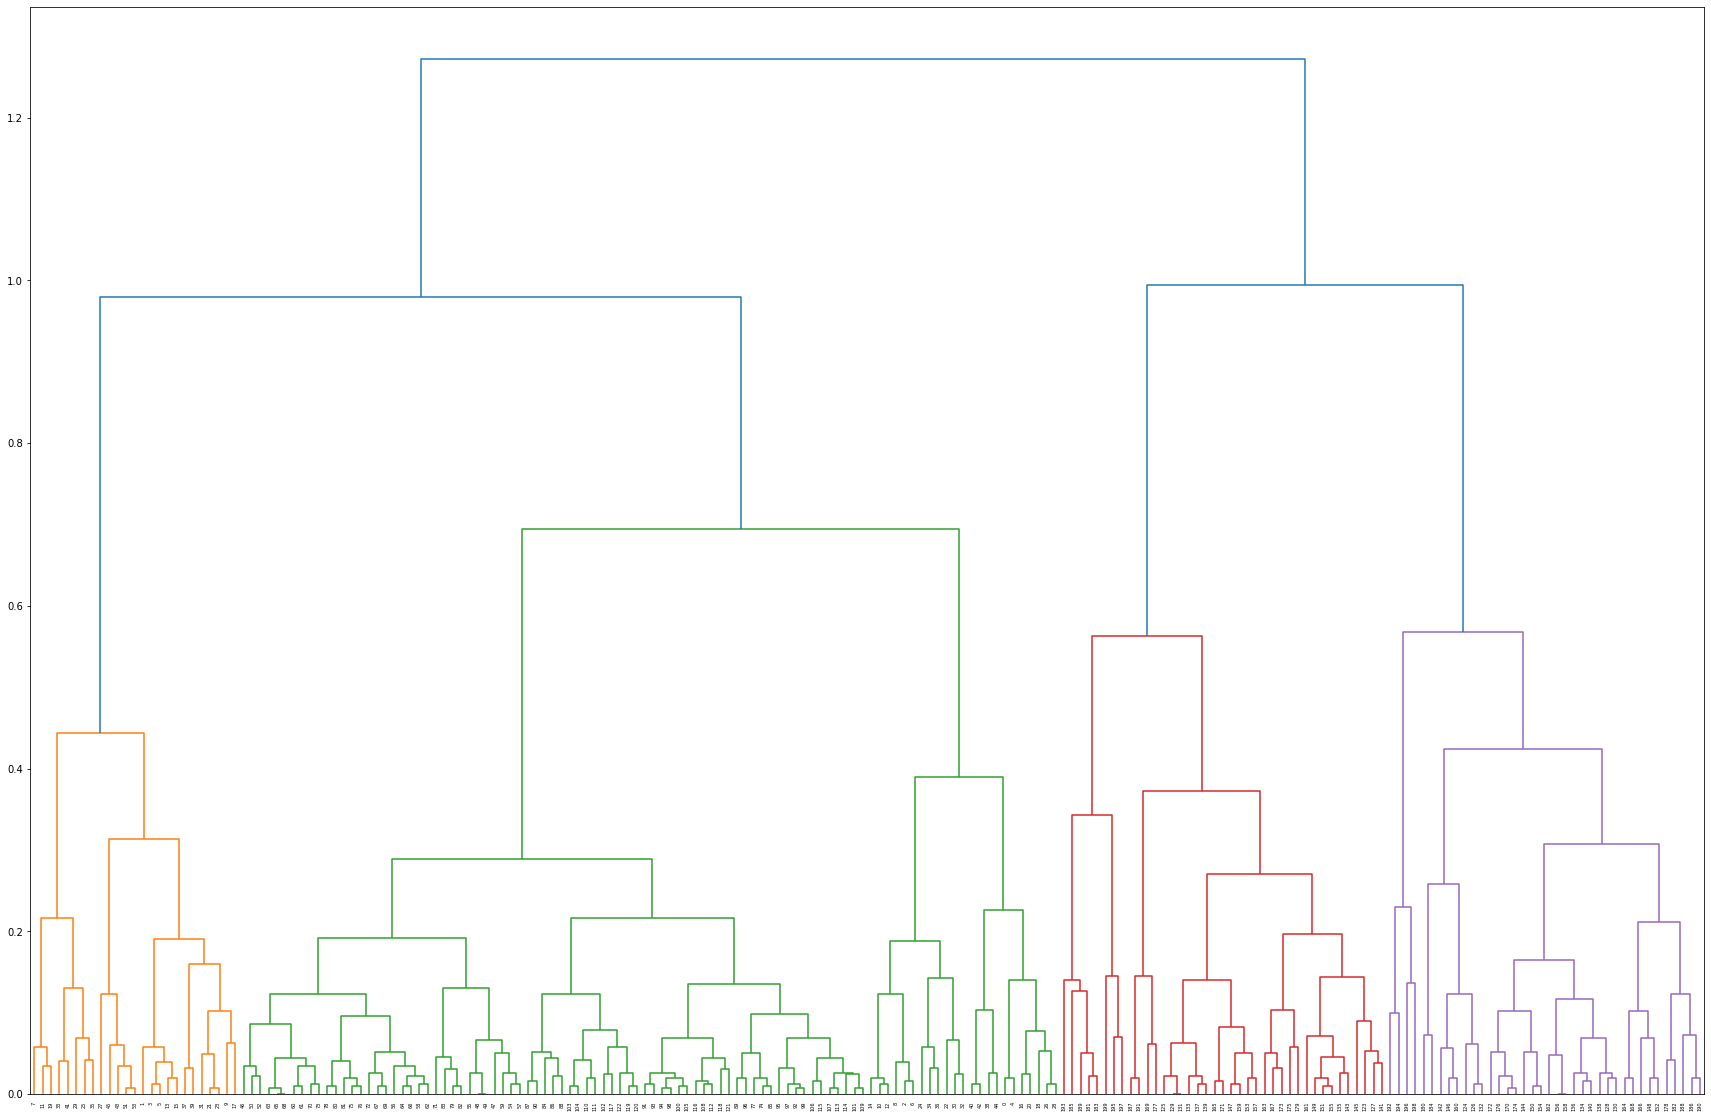

In [31]:
plt.figure(figsize=(30, 20))
mergings = linkage(df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()


In [32]:
cluster_1 = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [33]:
df['cluster_id'] = cluster_1
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


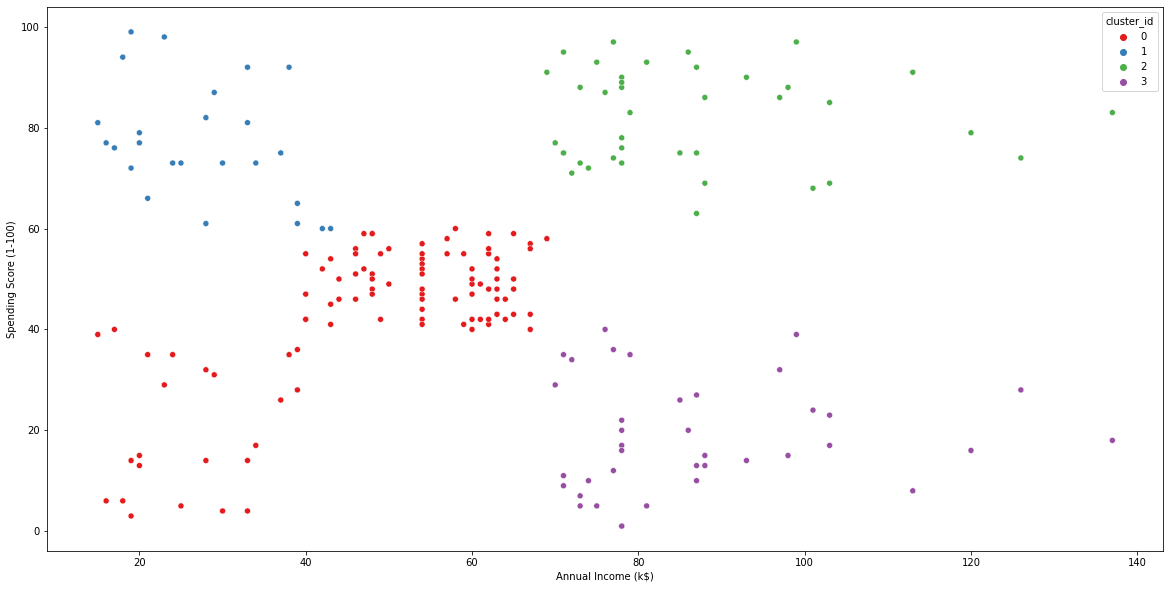

In [36]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='cluster_id', data = df, palette = 'Set1');


In [37]:
df['cluster_id'].value_counts()


0    98
2    39
3    38
1    25
Name: cluster_id, dtype: int64

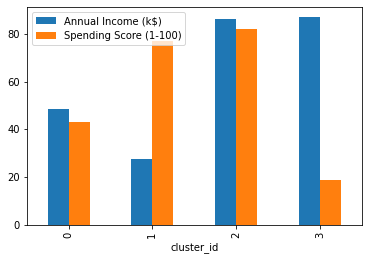

In [38]:
df.drop(['CustomerID', 'Age', 'Gender'], axis=1).groupby('cluster_id').mean().plot(kind='bar')
plt.show()


#### Cluster_id 2 are the best customers to the Mall they have high Annual income and they will have spending score, so we shouldn't loose these customers as they contribute a lot to mall income

#### Cluster _id 3 have more income but they spend less so we can target these customers with some offers, so they might tend to buy and increase their spending score,when we want market for some new products or with some special offers this cluster customers will be best
#### Cluser_id 0 are the intermediate level customers they have considerable spending score but their spending score can also be increased ,so we can go to them with some better offers and good products for marketing

#### cluster_id 1 are the customers where the income is low but they spend very good so these customers are sop good to our Mall

### DB Scan Clustering

#### To avoid noise in the clusters we use DB SCAN clustering. We can identify the clusters surreounded by another cluster in the DBSCAN clustering. NO prefedined clusters defined

In [39]:
from sklearn.cluster import DBSCAN
from collections import Counter


In [40]:
model = DBSCAN(eps=0.1, min_samples=10).fit(df_scaled)
print(model.labels_)


[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2 -1  2  3  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [41]:
df['cluster_lab'] = model.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,0,-1


In [42]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchidtan', 'deepink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda: colors[x % len(colors)])


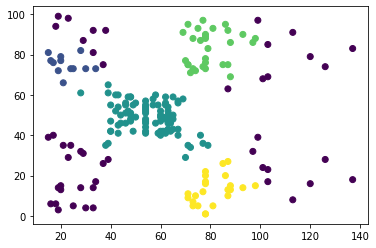

In [43]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster_lab'])


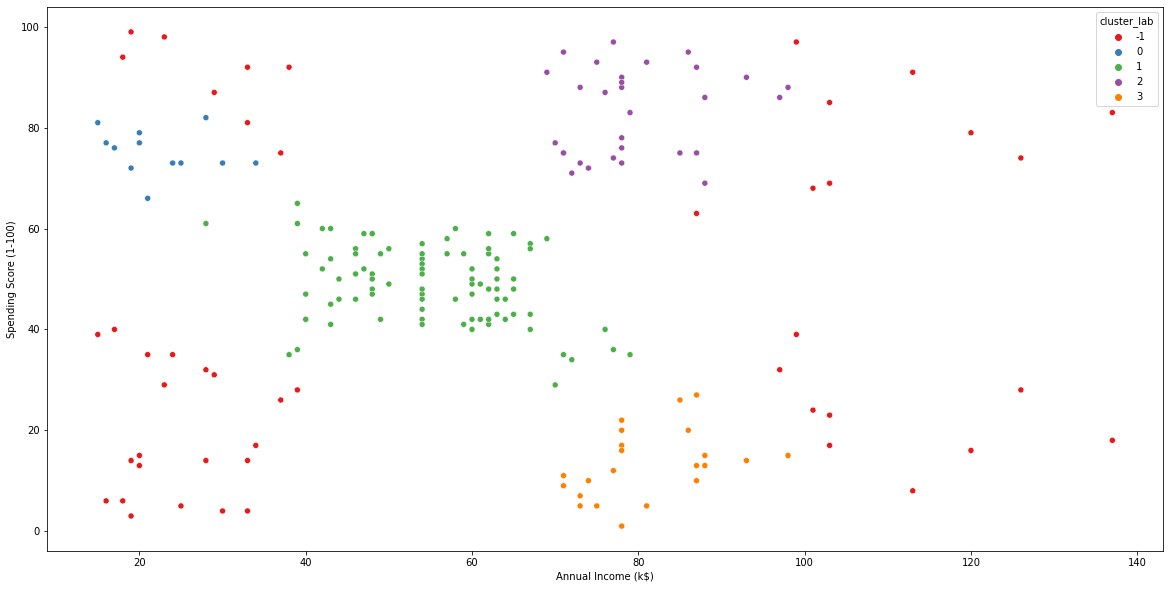

In [44]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_lab', data=df, palette = 'Set1')


In [45]:
df_scaled.describe()


,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,0.373443,0.502041
std,0.215285,0.263505
min,0.000000,0.000000
25%,0.217213,0.344388
50%,0.381148,0.500000
75%,0.516393,0.734694
max,1.000000,1.000000


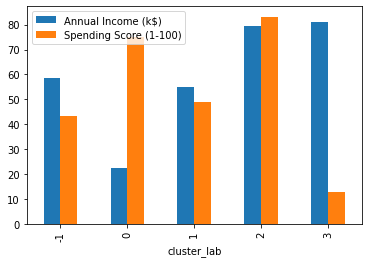

In [46]:
df.drop(['CustomerID', 'Age', 'Gender', 'cluster_id'], axis=1).groupby('cluster_lab').mean().plot(kind='bar')
plt.show()


### Valuable Customers

In [47]:
df[df['cluster_lab'] == 2]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
123,124,Male,39,69,91,2,2
125,126,Female,31,70,77,2,2
127,128,Male,40,71,95,2,2
129,130,Male,38,71,75,2,2
131,132,Male,39,71,75,2,2
133,134,Female,31,72,71,2,2
135,136,Female,29,73,88,2,2
137,138,Male,32,73,73,2,2
139,140,Female,35,74,72,2,2
141,142,Male,32,75,93,2,2


In [48]:
df[df['cluster_lab'] == 3]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
128,129,Male,59,71,11,3,3
130,131,Male,47,71,9,3,3
134,135,Male,20,73,5,3,3
136,137,Female,44,73,7,3,3
138,139,Male,19,74,10,3,3
140,141,Female,57,75,5,3,3
144,145,Male,25,77,12,3,3
148,149,Female,34,78,22,3,3
150,151,Male,43,78,17,3,3
152,153,Female,44,78,20,3,3


In [49]:
df[df['cluster_lab'] == 1]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
27,28,Male,35,28,61,1,1
40,41,Female,65,38,35,0,1
42,43,Male,48,39,36,0,1
43,44,Female,31,39,61,1,1
45,46,Female,24,39,65,1,1
...,...,...,...,...,...,...,...
126,127,Male,43,71,35,3,1
132,133,Female,25,72,34,3,1
142,143,Female,28,76,40,3,1
146,147,Male,48,77,36,3,1


In [50]:
df[df['cluster_lab'] == -1]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
2,3,Female,20,16,6,0,-1
4,5,Female,31,17,40,0,-1
6,7,Female,35,18,6,0,-1
7,8,Female,23,18,94,1,-1
8,9,Male,64,19,3,0,-1
10,11,Male,67,19,14,0,-1
11,12,Female,35,19,99,1,-1
12,13,Female,58,20,15,0,-1
14,15,Male,37,20,13,0,-1
